In [1]:
<h1> Model Development</h1>



<class 'SyntaxError'>: invalid syntax (<ipython-input-1-c5fbb755af5f>, line 1)

In [2]:
import piplite
await piplite.install('seaborn')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
%matplotlib inline

<ipython-input-4-875de28619f7>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# function to downlaod data resources
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())
    

In [6]:
# url pathS
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [7]:
await download(path, 'laptops.csv')
file_name = 'laptops.csv'

In [8]:
# loading the data downloaded into dataframes
df= pd.read_csv(file_name, header= 0)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
# CPU frequency could be a good prdictor of laptop prices, this is because its the parameter wity the lowest p-value amomg the different features in the dataset

In [13]:
X= df[['CPU_frequency']]
Y= df['Price']
lm = LinearRegression()
lm1 = lm.fit(X,Y)
Yhat = lm.predict(X)

In [ ]:
# Generating the distribution plot for the predicted values and that of the actual to evaluate how well the linera model perfomed

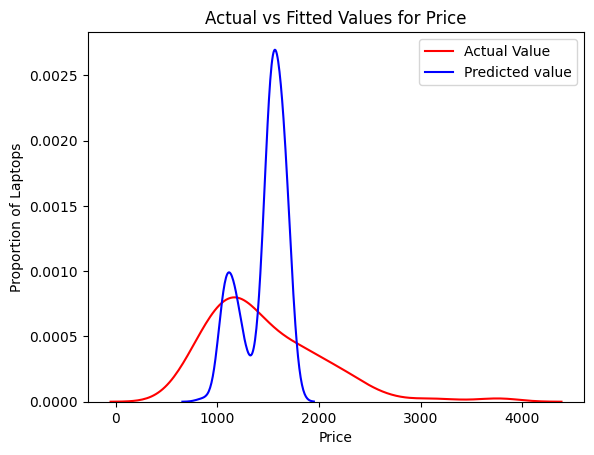

In [15]:
ax1 =sns.distplot(df['Price'], hist= False, color='r', label = 'Actual')


# Create a distriution plot for predicted values
sns.distplot(Yhat, hist=False, color='b', label= 'Fitted Values', ax= ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value', 'Predicted value'])
plt.show()

In [ ]:
# evaluate the means quared error and Rsquared values for the model

In [16]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)


The R-square for Linear Regression is:  0.13444363210243238
The mean square error of price and predicted value is:  284583.44058686297


In [ ]:
# For a morew accurate model,  the parameters whhich have a low enough p-value so as to indicate strong relationship with 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 

In [23]:
# Multiple Linear regression
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Y= df['Price']

lm2 = lm.fit(Z,Y)

yhat =lm2.predict(Z)


In [ ]:
#  Plot the distribution plot of the predicted value and the actual prices to evaluate the model

Text(0, 0.5, 'Proportion of laptops')

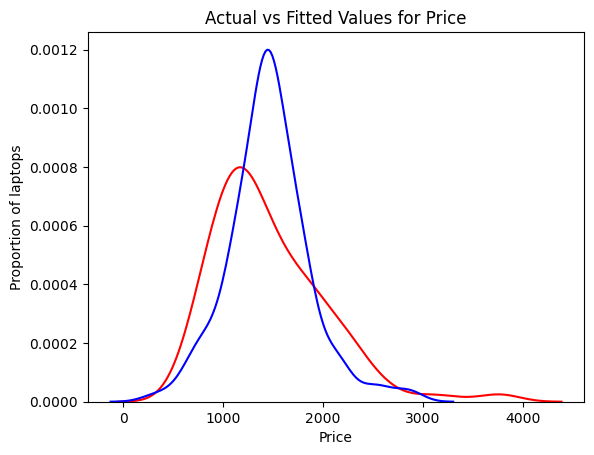

In [28]:
ax1 = sns.distplot(df['Price'],hist=False, color='r', label= 'Actual Value')
sns.distplot(yhat, hist= False, color= 'b', label= 'Fitted Values', ax =ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [39]:
# Polynomial Regression

In [42]:
X.flatten()
f1= np.polyfit(X,Y,1) #used np.polyfit is used to for polynomial regression
p1 = np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y, 5)
p5 = np.poly1d(f5)

In [47]:
# plot the regression graph
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
    plt.legend(['P1','P2','P3'])

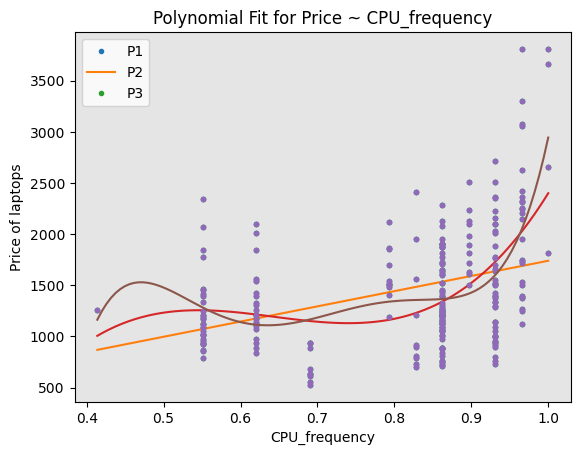

In [48]:
PlotPolly(p1,X,Y, 'CPU_frequency')
PlotPolly(p3,X,Y, 'CPU_frequency')
PlotPolly(p5,X,Y, 'CPU_frequency')

In [49]:
# Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.13444363210243282
The MSE value for 1st degree polynomial is:  284583.4405868628
The R-square value for 3rd degree polynomial is:  0.26692640796530986
The MSE value for 3rd degree polynomial is:  241024.8630384881
The R-square value for 5th degree polynomial is:  0.3030822706443803
The MSE value for 5th degree polynomial is:  229137.29548053825


In [50]:
# Create a pipeline that perdorms parameter scaling, polynomial feature genneration and linear regression

In [59]:
# split the data into train and test subsets
Z = Z.astype(float)
Z_train, Z_test, Y_train, Y_test = train_test_split(Z,Y, test_size= 0.2)
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_numpy()

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(Z_train,Y_train)
ypipe=pipe.predict(Z_test)

In [53]:
# Evaluate the MSE and R^2 values for the this predicted output.

In [60]:
#  Write your code below and press Shift+Enter to execute
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y_train, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y_train, ypipe))

<class 'ValueError'>: Found input variables with inconsistent numbers of samples: [190, 48]

In [ ]:
You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.